# Database Design using SQLite - Food Delivery App "*Foodzy*

- This notebook aims to design a sample database for a food delivery app **Foodzy**
- The Database design includes
   * Creating SQL tables
   * Populating the tables with dummy data
   * Creating few SQL queries to explore the dataset
- The Database design is implemented using **SQLite**


## Step 1: Setting up SQLite and Creating Table

##### The Database for the Food Delivery App contains the following tables
- **Users** : To store user details like name, address, phone no
- **Restaurants** : To store restaurant details
- **Menu** : This table contains the food items offered by various restaurants
- **Delivery Agent** : This table has Delivery Agent related information
- **Orders** : To store order related info, order amount,...
- **OrderItems** : This table contains the food items included in each order

##### The Database diagram is as follows

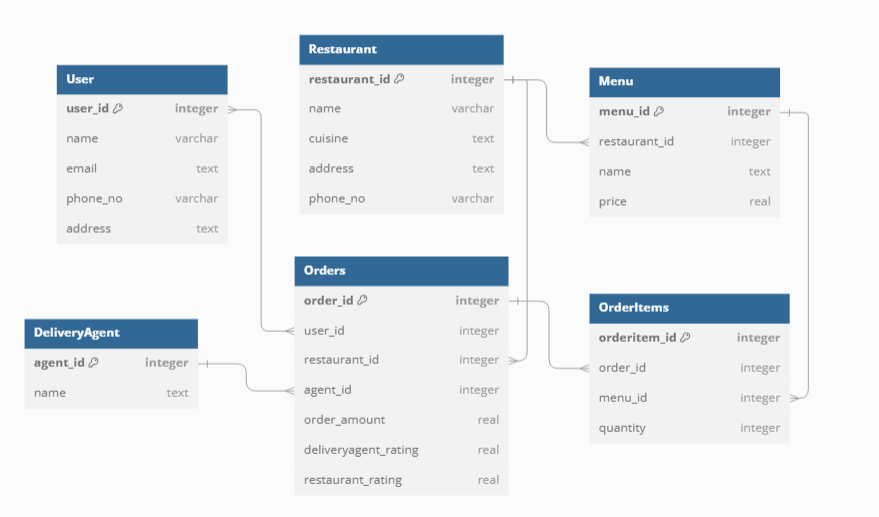

In [15]:
# imports
import sqlite3
import pandas as pd


# Connect to the SQLite database 
conn = sqlite3.connect('foodzy.db')
cursor = conn.cursor()


## Creating tables for the Food Delivery App

# Create Users table - to store the User information
cursor.execute('''
CREATE TABLE IF NOT EXISTS Users(
    user_id INTEGER PRIMARY KEY AUTOINCREMENT,    
    name VARCHAR(30) NOT NULL,
    email TEXT,
    phone_no VARCHAR(10),
    address TEXT NOT NULL
);
''')
print("Table 'Users' created successfully")



# Create Restaurants table - to store Restaurant Details
cursor.execute('''
CREATE TABLE IF NOT EXISTS Restaurant(
    restaurant_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(30) NOT NULL,
    cuisine TEXT,
    address TEXT,
    phone_no VARCHAR(10)
);
''')
print("Table 'Restaurants' created successfully")



# Create Menu table - to store Food Menu
cursor.execute('''
CREATE TABLE IF NOT EXISTS Menu(
    menu_id INTEGER PRIMARY KEY AUTOINCREMENT,
    restaurant_id INTEGER,
    name TEXT,
    price REAL,
    FOREIGN KEY(restaurant_id) REFERENCES Restaurant(restaurant_id)
);
''')
print("Table 'Menu' created successfully")



# Create DeliveryAgent table - to store info about Delivery partners
cursor.execute('''
CREATE TABLE IF NOT EXISTS DeliveryAgent(
    agent_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT
);
''')
print("Table 'DeliveryAgent' created successfully")



# Create Orders table - info about Orders
cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders(
    order_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    restaurant_id INTEGER,
    agent_id INTEGER,
    order_amount REAL,
    deliveryagent_rating REAL,
    restaurant_rating REAL,
    FOREIGN KEY(user_id) REFERENCES Users(user_id),
    FOREIGN KEY(restaurant_id) REFERENCES Restaurant(restaurant_id),
    FOREIGN KEY(agent_id) REFERENCES DeliveryAgent(agent_id)
);
''')
print("Table 'Orders' created successfully")



#Create OrderItems Table - info about menu items in each order
cursor.execute('''
CREATE TABLE IF NOT EXISTS OrderItems(
    orderitem_id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_id INTEGER,
    menu_id INTEGER,
    quantity INTEGER,
    FOREIGN KEY(order_id) REFERENCES Orders(order_id),
    FOREIGN KEY(menu_id) REFERENCES Menu(menu_id)
);
''')
print("Table 'OrderItems' created successfully")

Table 'Users' created successfully
Table 'Restaurants' created successfully
Table 'Menu' created successfully
Table 'DeliveryAgent' created successfully
Table 'Orders' created successfully
Table 'OrderItems' created successfully


## Step 2 : Inserting Data into Tables
- This step populates the tables using dummy data

### Inserting data into Users table

In [18]:
cursor.executemany('''
INSERT INTO Users (name, email, phone_no, address)
VALUES (?, ?, ?,?);
''', [
('Lara Dollard', 'ldollard0@disqus.com', '405-953-8290', 'Suite 55 36 Transport Avenue'),
('Barri McNabb', 'bmcnabb1@rediff.com', '249-160-9751', 'PO Box 77760 8907 Mitchell Road'),
('Kevon Gierardi', 'kgierardi2@go.com', '753-524-8050', 'PO Box 14418 896 Sachs Point'),
('Murial Vanichev', 'mvanichev3@opera.com', '845-732-2421', 'Room 1492 40 Talmadge Circle'),
('Kennan Howard', 'khoward4@who.int', '534-792-6487', 'Room 1217 43846 Sommers Court'),
('Lorie Gimert', 'lgimert5@omniture.com', '541-422-6754', 'Suite 44 9419 Ridgeview Way'),
('Monica Cochern', 'mcochern6@ox.ac.uk', '757-241-6338', '4th Floor 3940 Chinook Court'),
('Johnny Faustin', 'jfaustin7@ed.gov', '380-500-6346', 'Room 670 3220 Cordelia Circle'),
('Marten Purser', 'mpurser8@techcrunch.com', '223-197-1656', 'PO Box 51165 6 Hollow Ridge Plaza'),
('Abba Tyndall', 'atyndall9@1und1.de', '361-520-4519', 'Room 515 8 Bluejay Park'),
('Blanche Stannion', 'bstanniona@dyndns.org', '303-599-1474', 'Suite 69 0362 Algoma Road'),
('Marrilee Cuss', 'mcussb@umn.edu', '517-554-5240', 'PO Box 58039 34864 Vahlen Parkway'),
('Mignon McMurty', 'mmcmurtyc@feedburner.com', '358-858-2920', '12th Floor 8229 Fairview Center'),
('Murry Rosten', 'mrostend@state.gov', '347-453-3230', 'Apt 1516 396 Debs Park'),
('Lauraine Purry', 'lpurrye@cnbc.com', '968-643-4774', 'Room 117 00180 Thierer Place'),
('Courtney Tumini', 'ctuminif@fastcompany.com', '595-994-3332', 'Suite 92 4 Elka Parkway'),
('Shell Fagge', 'sfaggeg@canalblog.com', '424-791-2751', 'PO Box 41672 6 Tennyson Lane'),
('Anette Wildey', 'awildeyh@ifeng.com', '822-311-9579', 'Room 1185 9 Dwight Point'),
('Fawn Nicholls', 'fnichollsi@rakuten.co.jp', '876-271-7613', 'Suite 63 091 Acker Court'),
('Jennette Gianotti', 'jgianottij@google.es', '522-519-2476', 'PO Box 42220 2659 Autumn Leaf Circle'),
('Laney Swatland', 'lswatlandk@usnews.com', '589-280-1607', 'Room 1328 44 Monterey Drive'),
('Jodie Vale', 'jvalel@woothemes.com', '889-137-0159', 'Suite 81 69910 Alpine Trail'),
('Farah Greenroa', 'fgreenroam@aboutads.info', '502-612-4951', 'Apt 684 34081 Talisman Pass'),
('Hakim Bonnar', 'hbonnarn@google.it', '659-130-6934', 'Apt 1402 178 Spenser Hill'),
('Melisenda Brayfield', 'mbrayfieldo@tuttocitta.it', '976-442-8923', 'Apt 1555 43452 Barby Place'),
('Curr Warham', 'cwarhamp@friendfeed.com', '504-336-1946', 'PO Box 53340 641 Colorado Avenue'),
('Phoebe Thornthwaite', 'pthornthwaiteq@domainmarket.com', '680-119-2144', 'Apt 297 97 Moose Park'),
('Lela Lyttle', 'llyttler@dropbox.com', '976-415-6976', 'Suite 8 7853 Gale Crossing'),
('Bernhard Nassi', 'bnassis@xinhuanet.com', '281-663-7209', 'Suite 45 960 Killdeer Hill'),
('Caril Messham', 'cmesshamt@indiegogo.com', '541-610-0885', '17th Floor 404 Mayer Road'),
('Linn Oliff', 'loliffu@taobao.com', '335-843-7477', 'Suite 31 4 Bellgrove Hill'),
('Sylas Bonifazio', 'sbonifaziov@posterous.com', '641-773-8909', 'Suite 87 2 Gina Lane'),
('Curtis Gerb', 'cgerbw@typepad.com', '548-935-3189', 'Suite 4 40 Holy Cross Drive'),
('Emmalynn Scamel', 'escamelx@flavors.me', '326-226-1370', '13th Floor 627 Veith Terrace'),
('Davie Duval', 'dduvaly@livejournal.com', '207-401-6091', 'Apt 318 0406 Comanche Hill'),
('Casandra Cottisford', 'ccottisfordz@pinterest.com', '496-713-5485', 'Room 359 41896 Weeping Birch Pass'),
('Che Eminson', 'ceminson10@google.com.au', '612-459-5867', 'Suite 68 868 Comanche Way'),
('Lorelei Reoch', 'lreoch11@chron.com', '400-434-4759', 'Apt 708 25 Cardinal Junction'),
('Nilson Glenwright', 'nglenwright12@joomla.org', '545-847-7029', 'Suite 20 03 Bunting Crossing'),
('Elnore Staniford', 'estaniford13@vistaprint.com', '691-609-6236', '12th Floor 67 Mandrake Alley'),
('Jillayne Baress', 'jbaress14@alexa.com', '128-550-9094', 'PO Box 91725 250 Golden Leaf Court'),
('Dwain Burwin', 'dburwin15@freewebs.com', '511-425-4799', 'Apt 735 53 Mosinee Court'),
('Catarina Jadczak', 'cjadczak16@nih.gov', '870-294-9081', 'Room 1216 975 Blackbird Street'),
('Morley Du Hamel', 'mdu17@latimes.com', '864-702-8175', 'PO Box 78992 7491 Lake View Center'),
('Cthrine Deeley', 'cdeeley18@foxnews.com', '972-353-2941', 'Apt 1323 70 Schmedeman Street'),
('Ives Lodwick', 'ilodwick19@altervista.org', '270-531-2918', 'PO Box 69455 6430 Village Green Lane'),
('Angelika Oddey', 'aoddey1a@google.co.jp', '282-130-4312', 'Room 1915 828 Dwight Road'),
('Nissy Cyples', 'ncyples1b@pcworld.com', '334-374-2639', 'Apt 1109 32 Erie Center'),
('Roseann Biagioni', 'rbiagioni1c@yahoo.co.jp', '946-292-6474', 'Apt 987 62 Arrowood Road'),
('Thacher Zywicki', 'tzywicki1d@multiply.com', '319-513-4589', 'Suite 79 5550 Lien Avenue'),
('Dicky Bett', 'dbett1e@techcrunch.com', '203-113-9858', 'PO Box 63668 0619 Loftsgordon Junction'),
('Kristen Clutton', 'kclutton1f@msu.edu', '137-403-2732', 'Suite 32 95280 Parkside Crossing'),
('Riley Fermin', 'rfermin1g@ucla.edu', '933-427-3758', 'Apt 76 31 Village Terrace'),
('Layton Pearman', 'lpearman1h@php.net', '767-784-4869', 'Suite 79 3 Rutledge Terrace'),
('Saidee Bexley', 'sbexley1i@shutterfly.com', '570-839-6134', 'PO Box 5937 8063 Mariners Cove Road'),
('Zeke Brozsset', 'zbrozsset1j@nydailynews.com', '503-246-6449', '6th Floor 01 Autumn Leaf Place'),
('Elroy Shimoni', 'eshimoni1k@blog.com', '973-851-7897', 'PO Box 58367 0 Menomonie Point'),
('Coop Aldcorn', 'caldcorn1l@fastcompany.com', '311-125-1641', 'Suite 59 0 Pepper Wood Junction'),
('Lynelle Lanon', 'llanon1m@toplist.cz', '744-247-9101', 'Apt 1314 826 Glacier Hill Junction'),
('Ives Smethurst', 'ismethurst1n@flickr.com', '774-399-4451', 'PO Box 80099 1550 Larry Trail'),
('Jerrine Fillimore', 'jfillimore1o@rambler.ru', '554-890-5089', 'Room 178 0 Dixon Street'),
('Trstram Plumley', 'tplumley1p@tumblr.com', '363-665-7794', '3rd Floor 27306 Ilene Junction'),
('Garnet Putley', 'gputley1q@jiathis.com', '548-627-4960', '19th Floor 544 Main Avenue'),
('Joanie Galliford', 'jgalliford1r@accuweather.com', '792-602-1355', '10th Floor 7793 Springview Parkway'),
('Tully Meysham', 'tmeysham1s@yahoo.co.jp', '145-509-3346', 'PO Box 92555 8485 Orin Hill'),
('Carly Jaskowicz', 'cjaskowicz1t@uol.com.br', '418-533-5986', '9th Floor 5 Redwing Place'),
('Mab Murrock', 'mmurrock1u@cmu.edu', '217-969-0272', '12th Floor 267 Tennyson Lane'),
('Roslyn Vreede', 'rvreede1v@parallels.com', '222-679-8180', 'Apt 61 02 Scoville Way'),
('Demetris Petegre', 'dpetegre1w@cafepress.com', '886-910-0566', 'PO Box 22506 9297 Ronald Regan Road'),
('Jed Klemke', 'jklemke1x@printfriendly.com', '499-366-5588', '12th Floor 843 Mifflin Crossing'),
('Carry Royson', 'croyson1y@reuters.com', '462-968-6165', 'Suite 66 49534 Charing Cross Park'),
('Stella Goby', 'sgoby1z@moonfruit.com', '610-908-1332', '9th Floor 23107 Kinsman Place'),
('Erwin Schuh', 'eschuh20@cnn.com', '903-455-2008', 'Apt 1423 9862 Monica Avenue'),
('Giordano Dust', 'gdust21@networksolutions.com', '490-949-5324', '14th Floor 35429 Bowman Center'),
('Kare Gentle', 'kgentle22@studiopress.com', '832-857-8103', '9th Floor 61 Monica Circle'),
('Waylan Raubenheimers', 'wraubenheimers23@soundcloud.com', '412-442-3307', 'Suite 55 2 Towne Pass'),
('Guillermo Radbond', 'gradbond24@toplist.cz', '786-143-1596', 'Suite 17 00 Basil Parkway'),
('Sheff Nast', 'snast25@abc.net.au', '366-108-9471', 'Suite 22 23 Pankratz Alley'),
('Minetta Plank', 'mplank26@dagondesign.com', '496-969-1480', '5th Floor 1342 Westend Place'),
('Poul Jacmar', 'pjacmar27@angelfire.com', '937-106-1233', 'Room 1589 8459 Independence Point'),
('Guinevere Ricciardo', 'gricciardo28@godaddy.com', '345-451-7193', 'Suite 66 74230 Moose Point'),
('Burr Hucke', 'bhucke29@mapquest.com', '741-948-3356', 'Apt 845 7 Norway Maple Plaza'),
('Dionisio Clem', 'dclem2a@census.gov', '149-552-6519', 'Suite 95 81 Corry Avenue'),
('Ericha Siderfin', 'esiderfin2b@pinterest.com', '934-729-3534', 'Apt 1724 47 Almo Alley'),
('Ram Justice', 'rjustice2c@ca.gov', '865-778-5243', '2nd Floor 408 Village Green Terrace'),
('Free Cardero', 'fcardero2d@dmoz.org', '711-254-2596', 'Room 1573 0039 Nelson Parkway'),
('Cheslie Dossett', 'cdossett2e@barnesandnoble.com', '607-111-7389', '9th Floor 977 Sloan Terrace'),
('Mina Slucock', 'mslucock2f@patch.com', '635-127-7997', 'Apt 704 055 Burrows Road'),
('Vanda Chessun', 'vchessun2g@ocn.ne.jp', '614-467-8006', '1st Floor 91 Meadow Valley Way'),
('Pierette Dirr', 'pdirr2h@wp.com', '455-162-3861', 'Room 1678 45 Rockefeller Street'),
('Say Marvel', 'smarvel2i@scientificamerican.com', '982-775-8602', 'PO Box 6512 04 Anhalt Avenue'),
('Ollie Goshawke', 'ogoshawke2j@slashdot.org', '445-143-7549', 'Suite 44 9 West Circle'),
('Margareta Dodson', 'mdodson2k@tripod.com', '586-718-9328', 'Apt 585 1 Old Shore Junction'),
('Bay Tieraney', 'btieraney2l@163.com', '718-584-9250', 'Apt 456 024 Kropf Way'),
('Vinny Tythacott', 'vtythacott2m@opera.com', '108-556-0736', 'Room 151 12031 Grim Alley'),
('Celestia Doveston', 'cdoveston2n@slideshare.net', '136-432-2429', 'Apt 973 70 Portage Plaza'),
('Alonso Richmont', 'arichmont2o@webeden.co.uk', '166-922-3726', 'Suite 13 730 Logan Place'),
('Danny Jerram', 'djerram2p@mashable.com', '239-537-4592', 'Suite 98 7 Burrows Pass'),
('Hunt Jesson', 'hjesson2q@slate.com', '651-922-2178', 'Room 195 9 Schmedeman Center'),
('Rudyard Longman', 'rlongman2r@prlog.org', '179-386-1719', 'Apt 229 5212 Erie Circle'),
])
conn.commit()

print('Data has been added to Users table')
print('Sample rows from Users table')
df = pd.read_sql_query("SELECT * from Users", conn)
df.sample(5)

Data has been added to Users table
Sample rows from Users table


,user_id,name,email,phone_no,address
60,61,Jerrine Fillimore,jfillimore1o@rambler.ru,554-890-5089,Room 178 0 Dixon Street
20,21,Laney Swatland,lswatlandk@usnews.com,589-280-1607,Room 1328 44 Monterey Drive
16,17,Shell Fagge,sfaggeg@canalblog.com,424-791-2751,PO Box 41672 6 Tennyson Lane
75,76,Waylan Raubenheimers,wraubenheimers23@soundcloud.com,412-442-3307,Suite 55 2 Towne Pass
56,57,Elroy Shimoni,eshimoni1k@blog.com,973-851-7897,PO Box 58367 0 Menomonie Point


### Inserting data into Restaurants table

In [20]:
cursor.executemany('''
INSERT INTO Restaurant (name, cuisine, address, phone_no)
VALUES (?, ?, ?, ?);
''', [
('Pollo Tropical', 'Latin American Restaurant', '1830 W 8th St','555-1234'),
('Arbys', 'Fast Food Restaurants', '5480 Peachtree Pkwy','555-5678'),
('In-N-Out Burger', 'Fast Food Restaurants', '920 E Playa del Norte Dr','555-8765'),
('Dunkin Donuts', 'Bakeries / Desserts', '726 SW Mt Si Blvd','555-1122'),
('Wienerschnitzel', 'Hot Dog Joint ', '1045 S Willow Street','555-7788'),
('Jack in the Box', 'Fried Chicken Joint', '1115 E Main','555-3344'),
('Papa Johns Pizza',   'Pizza Place',   '5460 Airline Hwy','555-2233'),
('Happy Dragon	', 'Chinese Restaurant', '1990 Ostrems Way','555-4455'),
('Quiznos Sub	', 'Sandwiches / Wraps', '9656 Springboro Pike','555-8899'),
('El Pollo Loco', 'Mexican Restaurant', '602 E Broadway','555-3300'),
('Subway', 'Fast Food Restaurant','9221 Lakeside Blvd','555-3312'),
('Burger King','Fast Food Restaurant','25560 Kingsland Blvd','555-3456'),
('Chick-fil-A','ast Food Restaurants','3450 Wrightsboro Rd','555-0198'),
('White Castle','Burger Joint','16737 Harper Ave','555-1012'),
('Taco Bell','Fast Food Restaurant and Mexican','1501 N Hervey St','555-4321'),
('KFC','Fast Food Restaurant','602 E Gravis St','555-4367'),
('Pitas Republic','Middle Eastern Restaurant','5105 E Fowler Ave','555-6743'),
('Checkers','Burger Joint','502 Liberty Sq','545-6781'),
('Panera Bread','Bakery, Restaurant','2420 S 31st St','555-4670'),
('Carvel','Fast Food','1 Airport Blvd','555-0871')
])
conn.commit()

print('Data has been added to Restaurants table')
print('Sample rows from Restaurant table')
df = pd.read_sql_query("SELECT * from Restaurant", conn)
df.sample(5)

Data has been added to Restaurants table
Sample rows from Restaurant table


,restaurant_id,name,cuisine,address,phone_no
17,18,Checkers,Burger Joint,502 Liberty Sq,545-6781
8,9,Quiznos Sub\t,Sandwiches / Wraps,9656 Springboro Pike,555-8899
1,2,Arbys,Fast Food Restaurants,5480 Peachtree Pkwy,555-5678
16,17,Pitas Republic,Middle Eastern Restaurant,5105 E Fowler Ave,555-6743
2,3,In-N-Out Burger,Fast Food Restaurants,920 E Playa del Norte Dr,555-8765


### Inserting data into Menu table

In [22]:
cursor.executemany('''
INSERT INTO Menu (restaurant_id, name, price)
VALUES (?, ?, ?);
''', [
 (1, 'Trophichop Bowl', 13.49),
 (1, 'Chocolate Cake', 11.49),
 (1, 'Crispy Classic Chicken Sandwich', 8.99),
 (1, 'Tropical Trio', 4.79),
 (1, 'Chicken Quesadilla Wrap', 10.61),
 (2, 'Greek Gyro', 15.43),
 (2, 'Fried Mac n Cheese Bites', 7.89),
 (2, 'Chicken Tenders', 9.55),
 (2, 'Curly Fries', 5.22),
 (2, 'Classic Lemonade', 3.42),
 (3, 'CheeseBurger', 8.42),
 (3, 'Hamburger', 10.99),
 (3, 'French Fried', 4.62),
 (3, 'Iced Tea', 3.12),
 (4, 'Strawberry Donut', 8.99),
 (4, 'Boston Kreme Donut', 7.65),
 (4, 'Nutty Choco Donut', 4.67),
 (4, 'Nutty Ube Donut', 4.67),
 (4, 'Coffee Nut Donut', 8.9),
 (5, 'Chilli Cheese Dog', 10.9),
 (5, 'Chilli Dog', 8.76),
 (5, 'Kraut Dog', 6.5),
 (5, 'Mini Corn Dogs', 4.34),
 (6, 'Jack Pack', 7.49),
 (6, 'Jr CheeseBurger', 6.89),
 (6, 'Value Curly Fried', 3.69),
 (6, 'Double Jack', 9.19),
 (7, 'Garlic Bread', 3.62),
 (7, 'Cheesy Pizza', 9.18),
 (7, 'Garden Special Pizza', 10.45),
 (8, 'Fried Wonton', 1.65),
 (8, 'Crab Rangoon', 2.95),
 (8, 'Fried CHicken Wings', 6.75),
 (8, 'Dumplings', 6.95),
 (9, 'Lobster Classic', 11.34),
 (9, 'Classic Italian', 14.67),
 (9, 'Chicken Carbinara', 15.5),
 (9, 'French Dip', 1.5),
 (10, 'Chicken Bowl', 10.76),
 (10, 'Loco Fries', 6.57),
 (10, 'Mud Cake', 2.34),
 (10, 'Iced Tea', 1.45),
 (10, 'Tortilla', 7.65),
 (11,'Carved Turkey Sub',7.75),
 (11, 'Black Forest Ham',5.50),
 (11, 'Subway Club', 6.75),
 (11, 'Veggie Delite', 5.50),
 (12,'Whooper', 6.19),
 (12, 'Crispy Chicken', 6.39),
 (12, 'Bacon King', 8.19),
 (12, 'Texas Double Whooper', 8.19),
 (13,'Chicken Sandwich', 6.30),
 (13,'Waffle Potato Fries', 3.29),
 (13,'Freshly brewed Iced Tea', 2.99),
 (13,'Cobb Salad', 12.39),
 (13,'Forsted Lemonade', 5.89),
 (14, 'Smoky Joe', 1.49),
 (14, 'Panko Fish Slider', 2.29),
 (14,  'Mini Belgium Waffles', 2.29),
 (14, 'Has Brown Nibblers', 1.99),
 (15, 'Soft Taco', 1.69),
 (15, 'Classic Combo', 5.00),
 (15,'Crunchy Taco Supreme', 2.49),
 (15, 'Burrito Supreme Combo', 7.59),
 (16, 'Fried Chicken - 2Pc',6.49),
 (16, 'Classic Chicken Sandwich', 6.99),
 (16, 'Tenders - 3 Pc', 8.49),
 (17, 'Tex Mex Wrap', 11.95),
 (17, 'Chicken Pita', 10.95),
 (17, 'Gyros Pita', 10.95),
 (17, 'Hummus-n-Pita', 3.95),
 (18, 'Big Buford', 8.55),
 (18, 'Seasoned Tenders', 7.43),
 (18, 'Grilled Hot Dog', 2.64),
 (19, 'Mac & Cheese', 7.79),
 (19, 'Turkey Chilli', 8.89),
 (19, 'Cinnamon Crunch Bagel', 2.29),
 (20, 'Pistachio & Choco Crunchies', 6.79),
 (20, 'Classic Sundae', 10.69),
 (20, 'Sorbet', 4.19),
 (20, 'Carvelanche', 8.49) 
])
conn.commit()


print('Data has been added to Menu table')
print('Sample rows from Menu table')
df = pd.read_sql_query("SELECT * from Menu", conn)
df.sample(5)

Data has been added to Menu table
Sample rows from Menu table


,menu_id,restaurant_id,name,price
71,72,18,Big Buford,8.55
26,27,6,Double Jack,9.19
80,81,20,Carvelanche,8.49
56,57,14,Smoky Joe,1.49
46,47,11,Veggie Delite,5.50


### Inserting data into Delivery Agents table

In [24]:
cursor.execute('''
INSERT INTO DeliveryAgent(name)
VALUES 
('John Doe'),
('Jane Smith'),
('Bob Brown'),
('Alice Johnson'),
('Charlie Davis'),
('David Martinez'),
('Eve Wilson'),
('Frank Moore'),
('Grace Taylor'),
('Helen Anderson'),
('Irene Thomas'),
('Jack Jackson'),
('Karen Lee'),
('Leo White'),
('Mason Harris');
''')

print('Data has been added to DeliveryAgent table')
print('Sample rows from DeliveryAgent table')
df = pd.read_sql_query("SELECT * from DeliveryAgent", conn)
df.sample(5)

Data has been added to DeliveryAgent table
Sample rows from DeliveryAgent table


,agent_id,name
0,1,John Doe
10,11,Irene Thomas
6,7,Eve Wilson
5,6,David Martinez
1,2,Jane Smith


### Inserting into Orders table

In [26]:
cursor.executemany('''
INSERT INTO Orders (order_id, user_id, restaurant_id, agent_id, order_amount, deliveryagent_rating, restaurant_rating)
VALUES (?, ?, ? , ? , ?, ?, ?);
''', [
(1, 63, 7, 15, 39.67, 1.1, 3.8) ,
(2, 89, 5, 5, 26.1, 1.1, 4.4) ,
(3, 23, 19, 4, 37.94, 3.9, 2.3) ,
(4, 77, 20, 15, 56.53, 2.9, 1.0) ,
(5, 48, 12, 3, 12.78, 2.4, 2.8) ,
(6, 38, 20, 10, 70.11, 3.7, 2.9) ,
(7, 41, 10, 13, 21.52, 1.6, 4.3) ,
(8, 27, 12, 1, 8.19, 3.3, 2.3) ,
(9, 28, 7, 10, 48.44, 3.6, 2.8) ,
(10, 70, 15, 11, 2.49, 1.8, 2.1) ,
(11, 88, 2, 3, 19.1, 3.8, 3.9) ,
(12, 44, 1, 4, 21.22, 1.6, 2.2) ,
(13, 63, 17, 15, 44.69, 3.5, 1.9) ,
(14, 78, 13, 7, 6.3, 2.5, 2.5) ,
(15, 12, 16, 11, 50.93, 2.5, 3.3) ,
(16, 17, 13, 12, 18.28, 1.6, 4.1) ,
(17, 12, 4, 2, 18.68, 1.3, 3.0) ,
(18, 5, 17, 13, 45.8, 2.1, 2.6) ,
(19, 45, 19, 13, 39.04, 2.3, 4.5) ,
(20, 63, 20, 2, 25.47, 1.0, 2.1) ,
(21, 42, 5, 13, 28.34, 3.9, 2.9) ,
(22, 87, 17, 4, 32.84, 3.5, 2.4) ,
(23, 92, 1, 6, 54.84, 1.2, 1.1) ,
(24, 18, 3, 14, 29.88, 1.8, 2.8) ,
(25, 78, 19, 1, 22.45, 4.6, 4.6) ,
(26, 16, 19, 1, 42.25, 3.4, 1.9) ,
(27, 33, 3, 12, 6.24, 2.7, 3.0) ,
(28, 4, 18, 6, 27.17, 2.0, 4.9) ,
(29, 52, 18, 1, 2.64, 1.4, 4.5) ,
(30, 68, 11, 10, 31.25, 2.0, 1.7) ,
(31, 79, 3, 2, 42.48, 2.5, 4.4) ,
(32, 65, 3, 1, 10.99, 1.9, 3.2) ,
(33, 32, 2, 9, 44.37, 3.2, 3.4) ,
(34, 37, 18, 2, 18.62, 2.1, 1.5) ,
(35, 88, 9, 11, 69.18, 1.9, 4.5) ,
(36, 62, 8, 13, 6.95, 5.0, 1.7) ,
(37, 62, 3, 8, 30.4, 4.7, 4.1) ,
(38, 2, 8, 5, 18.45, 2.1, 2.0) ,
(39, 91, 17, 7, 40.75, 3.7, 3.0) ,
(40, 60, 10, 5, 29.97, 1.2, 2.0) ,
(41, 73, 18, 14, 7.43, 3.6, 2.2) ,
(42, 33, 5, 12, 41.46, 1.6, 4.8) ,
(43, 76, 4, 2, 14.01, 3.4, 3.7) ,
(44, 92, 1, 9, 17.98, 1.0, 3.8) ,
(45, 100, 3, 2, 32.45, 2.2, 1.1) ,
(46, 87, 1, 9, 45.32, 2.2, 4.3) ,
(47, 32, 17, 15, 27.85, 2.5, 4.9) ,
(48, 29, 3, 14, 32.45, 3.2, 3.6) ,
(49, 100, 2, 1, 70.61, 3.6, 3.3) ,
(50, 63, 6, 11, 21.87, 4.9, 4.0) ,
(51, 97, 14, 12, 12.84, 1.9, 4.7) ,
(52, 52, 1, 2, 55.87, 1.6, 4.6) ,
(53, 4, 15, 15, 16.75, 3.6, 3.7) ,
(54, 77, 18, 9, 10.07, 4.0, 2.7) ,
(55, 24, 8, 12, 31.09, 3.4, 3.3) ,
(56, 32, 7, 2, 14.07, 4.4, 1.9) ,
(57, 11, 14, 12, 19.71, 3.1, 4.6) ,
(58, 5, 5, 1, 23.84, 4.3, 3.5) ,
(59, 64, 10, 6, 49.92, 4.2, 4.7) ,
(60, 81, 10, 3, 19.71, 3.0, 3.3) ,
(61, 94, 7, 7, 59.3, 4.2, 1.2) ,
(62, 56, 8, 15, 3.3, 4.8, 3.7) ,
(63, 7, 12, 4, 16.38, 3.3, 3.4) ,
(64, 4, 17, 13, 10.95, 1.8, 4.6) ,
(65, 90, 10, 9, 12.0, 4.0, 2.1) ,
(66, 33, 2, 8, 15.78, 3.3, 4.0) ,
(67, 24, 7, 12, 9.18, 1.4, 4.6) ,
(68, 67, 18, 10, 2.64, 1.5, 3.7) ,
(69, 55, 13, 15, 37.26, 3.2, 4.1) ,
(70, 72, 2, 7, 38.18, 4.5, 2.5) ,
(71, 93, 17, 1, 7.9, 2.9, 2.2) ,
(72, 86, 15, 9, 10.0, 4.8, 3.7) ,
(73, 100, 4, 11, 51.08, 1.2, 2.5) ,
(74, 40, 7, 5, 9.18, 2.2, 1.2) ,
(75, 85, 8, 4, 27.6, 4.3, 2.0) ,
(76, 40, 19, 12, 17.78, 4.7, 4.5) ,
(77, 96, 19, 5, 27.95, 2.8, 2.7) ,
(78, 46, 9, 8, 32.5, 2.2, 2.1) ,
(79, 21, 5, 1, 45.7, 4.6, 3.1) ,
(80, 4, 16, 7, 43.44, 1.8, 2.1) ,
(81, 91, 16, 4, 23.47, 1.4, 2.8) ,
(82, 90, 7, 12, 29.22, 2.0, 4.7) ,
(83, 77, 10, 8, 13.26, 4.1, 3.3) ,
(84, 28, 10, 3, 35.18, 4.2, 2.6) ,
(85, 75, 2, 15, 14.77, 4.0, 4.0) ,
(86, 28, 6, 11, 6.89, 4.9, 1.2) ,
(87, 68, 5, 4, 19.5, 2.3, 3.5) ,
(88, 17, 4, 6, 12.32, 4.1, 3.1) ,
(89, 4, 7, 14, 56.95, 2.6, 1.0) ,
(90, 32, 6, 10, 9.19, 2.1, 4.6) ,
(91, 55, 16, 12, 23.47, 3.9, 2.7) ,
(92, 40, 17, 13, 10.95, 4.2, 3.1) ,
(93, 40, 8, 2, 2.95, 2.6, 1.4) ,
(94, 58, 8, 15, 13.5, 4.4, 2.4) ,
(95, 70, 19, 7, 52.33, 2.3, 2.8) ,
(96, 89, 17, 14, 44.8, 4.7, 4.1) ,
(97, 34, 9, 14, 81.03, 2.7, 4.9) ,
(98, 91, 20, 2, 6.79, 4.4, 2.4) ,
(99, 46, 7, 2, 7.24, 4.0, 4.3) ,
(100, 16, 1, 6, 79.78, 2.0, 1.9) ,
(101, 17, 17, 14, 3.95, 3.0, 1.7) ,
(102, 1, 7, 9, 48.44, 3.9, 5.0) ,
(103, 99, 7, 4, 17.68, 1.7, 3.8) ,
(104, 40, 20, 14, 40.45, 4.3, 4.5) ,
(105, 84, 3, 1, 17.78, 2.7, 3.2) ,
(106, 56, 9, 6, 45.67, 4.6, 3.6) ,
(107, 43, 10, 5, 27.36, 1.7, 3.4) ,
(108, 64, 17, 8, 11.85, 2.7, 2.8) ,
(109, 22, 4, 12, 28.96, 2.4, 2.2) ,
(110, 8, 5, 2, 26.28, 3.5, 1.2) ,
(111, 77, 4, 4, 31.0, 2.1, 4.7) ,
(112, 91, 13, 15, 2.99, 2.2, 1.7) ,
(113, 63, 14, 1, 12.84, 3.0, 4.3) ,
(114, 42, 12, 1, 67.71, 2.7, 4.2) ,
(115, 73, 8, 4, 19.8, 1.6, 5.0) ,
(116, 20, 2, 3, 25.33, 4.3, 3.6) ,
(117, 40, 7, 5, 27.54, 1.9, 3.6) ,
(118, 98, 4, 3, 26.7, 4.6, 4.5) ,
(119, 78, 7, 3, 12.8, 4.5, 2.1) ,
(120, 40, 4, 10, 16.64, 2.8, 2.5) ,
(121, 53, 7, 15, 7.24, 4.8, 1.2) ,
(122, 37, 5, 11, 45.7, 4.0, 2.9) ,
(123, 98, 19, 6, 25.57, 3.6, 3.4) ,
(124, 6, 13, 10, 12.39, 1.8, 2.2) ,
(125, 19, 19, 6, 39.04, 3.1, 3.6) ,
(126, 86, 4, 1, 24.29, 4.4, 1.1) ,
(127, 100, 10, 1, 26.22, 3.0, 2.3) ,
(128, 19, 17, 15, 21.9, 3.1, 3.5) ,
(129, 24, 10, 7, 25.43, 4.2, 2.6) ,
(130, 2, 18, 10, 17.5, 2.0, 4.8) ,
(131, 59, 12, 12, 34.95, 4.9, 1.8) ,
(132, 44, 16, 9, 19.47, 3.1, 3.7) ,
(133, 99, 10, 7, 16.75, 1.4, 1.1) ,
(134, 49, 3, 3, 33.82, 2.8, 3.3) ,
(135, 79, 18, 7, 32.45, 2.9, 3.5) ,
(136, 88, 17, 2, 21.9, 3.6, 3.6) ,
(137, 84, 16, 12, 13.98, 2.0, 3.6) ,
(138, 74, 3, 7, 8.42, 2.6, 3.9) ,
(139, 57, 2, 9, 23.67, 4.9, 1.5) ,
(140, 45, 20, 13, 8.49, 2.2, 2.8) ,
(141, 67, 5, 9, 41.42, 3.7, 4.7) ,
(142, 89, 12, 2, 12.78, 3.7, 3.0) ,
(143, 10, 3, 2, 41.69, 4.6, 3.3) ,
(144, 76, 5, 4, 21.8, 4.6, 1.5) ,
(145, 33, 2, 5, 12.05, 1.3, 1.6) ,
(146, 55, 19, 3, 24.65, 3.4, 3.1) ,
(147, 4, 15, 12, 15.96, 1.2, 1.1) ,
(148, 40, 11, 5, 24.25, 1.8, 1.8) ,
(149, 48, 2, 5, 19.2, 1.7, 1.8) ,
(150, 48, 11, 9, 13.5, 2.3, 3.8) ,
(151, 75, 1, 9, 36.47, 1.5, 3.6) ,
(152, 37, 12, 5, 67.7, 2.1, 1.7) ,
(153, 67, 10, 2, 23.86, 2.5, 2.5) ,
(154, 64, 4, 10, 22.91, 2.2, 3.2) ,
(155, 69, 15, 8, 12.54, 1.5, 2.5) ,
(156, 92, 1, 10, 8.99, 2.8, 2.6) ,
(157, 8, 15, 6, 2.49, 2.2, 3.2) ,
(158, 33, 14, 3, 9.16, 1.5, 1.7) ,
(159, 73, 10, 14, 36.96, 1.8, 4.9) ,
(160, 54, 6, 1, 36.33, 1.5, 1.6) ,
(161, 71, 17, 1, 7.9, 4.2, 1.8) ,
(162, 2, 15, 7, 18.38, 1.9, 2.3) ,
(163, 22, 20, 3, 46.84, 3.1, 1.2) ,
(164, 3, 15, 8, 4.98, 4.8, 1.7) ,
(165, 71, 14, 15, 4.47, 2.4, 3.4) ,
(166, 95, 16, 1, 44.44, 5.0, 2.2) ,
(167, 8, 10, 10, 28.54, 4.1, 2.2) ,
(168, 85, 7, 10, 62.51, 4.6, 4.8) ,
(169, 47, 3, 6, 25.25, 2.1, 4.6) ,
(170, 93, 8, 5, 27.2, 4.4, 3.9) ,
(171, 50, 14, 15, 6.87, 4.7, 1.7) ,
(172, 35, 18, 15, 30.84, 4.8, 3.0) ,
(173, 9, 19, 3, 8.89, 1.9, 3.8) ,
(174, 18, 16, 6, 13.98, 4.4, 4.9) ,
(175, 53, 15, 15, 7.47, 3.0, 1.2) ,
(176, 72, 20, 9, 32.94, 1.0, 4.9) ,
(177, 72, 6, 14, 14.98, 1.2, 4.1) ,
(178, 57, 8, 5, 27.2, 2.9, 3.4) ,
(179, 67, 18, 13, 48.43, 3.2, 1.2) ,
(180, 72, 8, 4, 24.4, 1.7, 1.3) ,
(181, 52, 4, 8, 31.99, 4.2, 4.7) ,
(182, 1, 3, 15, 41.69, 3.6, 1.3) ,
(183, 98, 8, 4, 10.05, 4.6, 4.7) ,
(184, 14, 2, 4, 6.84, 1.6, 1.9) ,
(185, 49, 14, 6, 7.26, 3.9, 4.1) ,
(186, 18, 1, 6, 62.56, 4.5, 3.3) ,
(187, 25, 1, 15, 59.45, 4.2, 1.9) ,
(188, 54, 5, 7, 13.1, 1.0, 1.3) ,
(189, 58, 1, 12, 40.47, 4.1, 3.2) ,
(190, 18, 9, 9, 80.52, 1.6, 2.3) ,
(191, 94, 7, 15, 38.4, 1.3, 4.4) ,
(192, 91, 10, 13, 45.92, 1.6, 3.4) ,
(193, 27, 1, 15, 30.21, 2.4, 3.4) ,
(194, 89, 19, 7, 27.86, 4.9, 3.9) ,
(195, 55, 5, 11, 37.04, 1.3, 4.1) ,
(196, 86, 4, 13, 32.34, 3.3, 1.5) ,
(197, 21, 15, 2, 6.68, 2.1, 1.3) ,
(198, 67, 10, 15, 33.71, 3.7, 3.0) ,
(199, 17, 18, 3, 35.72, 4.1, 3.2) ,
(200, 7, 13, 10, 24.88, 4.4, 3.3)
])
conn.commit()

print('Data has been added to Orders table')
print('Sample rows from Orders table')
df = pd.read_sql_query("SELECT * from Orders", conn)
df.sample(5)

Data has been added to Orders table
Sample rows from Orders table


,order_id,user_id,restaurant_id,agent_id,order_amount,deliveryagent_rating,restaurant_rating
177,178,57,8,5,27.20,2.9,3.4
164,165,71,14,15,4.47,2.4,3.4
19,20,63,20,2,25.47,1.0,2.1
95,96,89,17,14,44.80,4.7,4.1
84,85,75,2,15,14.77,4.0,4.0


### Inserting into OrderItems table

In [28]:
cursor.executemany('''
INSERT INTO OrderItems (order_id, menu_id, quantity)
VALUES (?, ?, ? );
''', [
(1, 29, 2) ,
(1, 30, 1) ,
(1, 28, 3) ,
(2, 21, 1) ,
(2, 23, 1) ,
(2, 22, 2) ,
(3, 77, 2) ,
(3, 76, 2) ,
(3, 75, 2) ,
(4, 79, 1) ,
(4, 78, 3) ,
(4, 81, 3) ,
(5, 49, 2) ,
(6, 80, 3) ,
(6, 79, 3) ,
(6, 81, 3) ,
(7, 39, 2) ,
(8, 50, 1) ,
(9, 29, 3) ,
(9, 30, 2) ,
(10, 63, 1) ,
(11, 8, 2) ,
(12, 5, 2) ,
(13, 71, 3) ,
(13, 69, 3) ,
(14, 52, 1) ,
(15, 65, 2) ,
(15, 66, 3) ,
(15, 67, 2) ,
(16, 55, 1) ,
(16, 56, 1) ,
(17, 17, 2) ,
(17, 18, 2) ,
(18, 69, 1) ,
(18, 70, 1) ,
(18, 68, 2) ,
(19, 76, 3) ,
(19, 77, 2) ,
(19, 75, 1) ,
(20, 81, 3) ,
(21, 20, 1) ,
(21, 21, 1) ,
(21, 23, 2) ,
(22, 70, 3) ,
(23, 4, 3) ,
(23, 1, 3) ,
(24, 13, 1) ,
(24, 11, 3) ,
(25, 77, 3) ,
(25, 75, 2) ,
(26, 75, 2) ,
(26, 76, 3) ,
(27, 14, 2) ,
(28, 73, 1) ,
(28, 72, 2) ,
(28, 74, 1) ,
(29, 74, 1) ,
(30, 46, 3) ,
(30, 45, 2) ,
(31, 11, 3) ,
(31, 12, 1) ,
(31, 14, 2) ,
(32, 12, 1) ,
(33, 10, 3) ,
(33, 9, 2) ,
(33, 7, 3) ,
(34, 74, 1) ,
(34, 72, 1) ,
(34, 73, 1) ,
(35, 37, 3) ,
(35, 35, 2) ,
(36, 34, 1) ,
(37, 11, 1) ,
(37, 12, 2) ,
(38, 31, 3) ,
(38, 33, 2) ,
(39, 71, 2) ,
(39, 70, 3) ,
(40, 43, 3) ,
(40, 41, 3) ,
(41, 73, 1) ,
(42, 21, 1) ,
(42, 20, 3) ,
(43, 17, 3) ,
(44, 3, 2) ,
(45, 11, 2) ,
(45, 13, 1) ,
(45, 12, 1) ,
(46, 5, 3) ,
(46, 1, 1) ,
(47, 71, 1) ,
(47, 68, 2) ,
(48, 11, 2) ,
(48, 13, 1) ,
(48, 12, 1) ,
(49, 6, 3) ,
(49, 8, 2) ,
(49, 9, 1) ,
(50, 25, 1) ,
(50, 24, 2) ,
(51, 58, 3) ,
(51, 60, 3) ,
(52, 4, 1) ,
(52, 5, 1) ,
(52, 1, 3) ,
(53, 63, 3) ,
(53, 64, 1) ,
(53, 61, 1) ,
(54, 74, 1) ,
(54, 73, 1) ,
(55, 32, 2) ,
(55, 33, 3) ,
(55, 31, 3) ,
(56, 28, 1) ,
(56, 30, 1) ,
(57, 60, 3) ,
(57, 59, 3) ,
(57, 58, 3) ,
(58, 22, 3) ,
(58, 23, 1) ,
(59, 41, 1) ,
(59, 39, 3) ,
(59, 43, 2) ,
(60, 40, 3) ,
(61, 29, 3) ,
(61, 28, 3) ,
(61, 30, 2) ,
(62, 31, 2) ,
(63, 51, 1) ,
(63, 50, 1) ,
(64, 70, 1) ,
(65, 43, 1) ,
(65, 42, 3) ,
(66, 7, 2) ,
(67, 29, 1) ,
(68, 74, 1) ,
(69, 52, 3) ,
(69, 55, 1) ,
(69, 54, 2) ,
(70, 8, 2) ,
(70, 10, 1) ,
(70, 9, 3) ,
(71, 71, 2) ,
(72, 62, 2) ,
(73, 16, 2) ,
(73, 15, 2) ,
(73, 19, 2) ,
(74, 29, 1) ,
(75, 34, 3) ,
(75, 33, 1) ,
(76, 76, 2) ,
(77, 75, 3) ,
(77, 77, 2) ,
(78, 38, 1) ,
(78, 37, 2) ,
(79, 23, 2) ,
(79, 22, 3) ,
(79, 21, 2) ,
(80, 65, 3) ,
(80, 67, 2) ,
(80, 66, 1) ,
(81, 67, 2) ,
(81, 65, 1) ,
(82, 29, 2) ,
(82, 28, 3) ,
(83, 41, 1) ,
(83, 42, 3) ,
(83, 40, 1) ,
(84, 39, 3) ,
(84, 42, 2) ,
(85, 8, 1) ,
(85, 9, 1) ,
(86, 25, 1) ,
(87, 22, 3) ,
(88, 18, 1) ,
(88, 16, 1) ,
(89, 28, 2) ,
(89, 29, 2) ,
(89, 30, 3) ,
(90, 27, 1) ,
(91, 67, 2) ,
(91, 65, 1) ,
(92, 69, 1) ,
(93, 32, 1) ,
(94, 33, 2) ,
(95, 76, 3) ,
(95, 77, 1) ,
(95, 75, 3) ,
(96, 69, 2) ,
(96, 70, 1) ,
(96, 68, 1) ,
(97, 35, 3) ,
(97, 36, 3) ,
(97, 38, 2) ,
(98, 78, 1) ,
(99, 28, 2) ,
(100, 1, 1) ,
(100, 2, 3) ,
(100, 5, 3) ,
(101, 71, 1) ,
(102, 29, 3) ,
(102, 30, 2) ,
(103, 30, 1) ,
(103, 28, 2) ,
(104, 80, 2) ,
(104, 79, 3) ,
(105, 11, 1) ,
(105, 14, 3) ,
(106, 36, 1) ,
(106, 37, 2) ,
(107, 43, 1) ,
(107, 40, 3) ,
(108, 71, 3) ,
(109, 17, 1) ,
(109, 15, 1) ,
(109, 16, 2) ,
(110, 21, 3) ,
(111, 16, 1) ,
(111, 17, 3) ,
(111, 18, 2) ,
(112, 54, 1) ,
(113, 60, 3) ,
(113, 59, 3) ,
(114, 51, 3) ,
(114, 50, 3) ,
(114, 48, 3) ,
(115, 32, 2) ,
(115, 34, 2) ,
(116, 8, 1) ,
(116, 7, 2) ,
(117, 29, 3) ,
(118, 19, 3) ,
(119, 28, 1) ,
(119, 29, 1) ,
(120, 16, 1) ,
(120, 15, 1) ,
(121, 28, 2) ,
(122, 20, 3) ,
(122, 22, 2) ,
(123, 76, 2) ,
(123, 75, 1) ,
(124, 55, 1) ,
(125, 75, 1) ,
(125, 76, 3) ,
(125, 77, 2) ,
(126, 16, 2) ,
(126, 15, 1) ,
(127, 43, 2) ,
(127, 40, 1) ,
(127, 42, 3) ,
(128, 69, 2) ,
(129, 41, 3) ,
(129, 39, 1) ,
(129, 43, 1) ,
(130, 73, 2) ,
(130, 74, 1) ,
(131, 51, 2) ,
(131, 48, 3) ,
(132, 65, 3) ,
(133, 42, 1) ,
(133, 43, 2) ,
(134, 13, 3) ,
(134, 11, 2) ,
(134, 14, 1) ,
(135, 72, 2) ,
(135, 74, 3) ,
(135, 73, 1) ,
(136, 70, 2) ,
(137, 66, 2) ,
(138, 11, 1) ,
(139, 7, 3) ,
(140, 81, 1) ,
(141, 22, 2) ,
(141, 21, 2) ,
(141, 20, 1) ,
(142, 49, 2) ,
(143, 12, 1) ,
(143, 13, 3) ,
(143, 11, 2) ,
(144, 20, 2) ,
(145, 9, 1) ,
(145, 10, 2) ,
(146, 76, 2) ,
(146, 77, 3) ,
(147, 64, 1) ,
(147, 62, 1) ,
(147, 61, 2) ,
(148, 45, 3) ,
(148, 44, 1) ,
(149, 7, 2) ,
(149, 10, 1) ,
(150, 46, 2) ,
(151, 2, 2) ,
(151, 1, 1) ,
(152, 51, 3) ,
(152, 50, 3) ,
(152, 48, 3) ,
(153, 41, 1) ,
(153, 39, 2) ,
(154, 18, 3) ,
(154, 19, 1) ,
(155, 63, 3) ,
(155, 61, 3) ,
(156, 3, 1) ,
(157, 63, 1) ,
(158, 59, 2) ,
(158, 58, 2) ,
(159, 41, 2) ,
(159, 39, 3) ,
(160, 27, 2) ,
(160, 26, 3) ,
(160, 25, 1) ,
(161, 71, 2) ,
(162, 62, 3) ,
(162, 61, 2) ,
(163, 81, 3) ,
(163, 79, 2) ,
(164, 63, 2) ,
(165, 57, 3) ,
(166, 67, 2) ,
(166, 65, 1) ,
(166, 66, 3) ,
(167, 41, 3) ,
(167, 39, 2) ,
(168, 28, 1) ,
(168, 30, 3) ,
(168, 29, 3) ,
(169, 11, 3) ,
(170, 34, 1) ,
(170, 33, 3) ,
(171, 58, 3) ,
(172, 73, 3) ,
(172, 72, 1) ,
(173, 76, 1) ,
(174, 66, 2) ,
(175, 63, 3) ,
(176, 78, 3) ,
(176, 80, 3) ,
(177, 24, 2) ,
(178, 33, 3) ,
(178, 34, 1) ,
(179, 74, 3) ,
(179, 73, 2) ,
(179, 72, 3) ,
(180, 31, 1) ,
(180, 34, 2) ,
(180, 32, 3) ,
(181, 15, 2) ,
(181, 17, 3) ,
(182, 12, 1) ,
(182, 11, 2) ,
(182, 13, 3) ,
(183, 33, 1) ,
(183, 31, 2) ,
(184, 10, 2) ,
(185, 57, 2) ,
(185, 60, 1) ,
(185, 59, 1) ,
(186, 4, 3) ,
(186, 5, 2) ,
(186, 3, 3) ,
(187, 5, 1) ,
(187, 2, 3) ,
(187, 4, 3) ,
(188, 23, 1) ,
(188, 21, 1) ,
(189, 1, 3) ,
(190, 37, 3) ,
(190, 35, 3) ,
(191, 29, 3) ,
(191, 28, 3) ,
(192, 43, 3) ,
(192, 39, 2) ,
(192, 42, 1) ,
(193, 3, 1) ,
(193, 5, 2) ,
(194, 75, 1) ,
(194, 77, 1) ,
(194, 76, 2) ,
(195, 23, 1) ,
(195, 20, 3) ,
(196, 15, 1) ,
(196, 18, 3) ,
(196, 17, 2) ,
(197, 62, 1) ,
(197, 61, 1) ,
(198, 39, 1) ,
(198, 43, 3) ,
(199, 73, 1) ,
(199, 72, 3) ,
(199, 74, 1) ,
(200, 52, 3) ,
(200, 54, 2)
])
conn.commit()

print('Data has been added to OrderItems table')
print('Sample rows from OrderItems table')
df = pd.read_sql_query("SELECT * from OrderItems", conn)
df.sample(5)

Data has been added to OrderItems table
Sample rows from OrderItems table


,orderitem_id,order_id,menu_id,quantity
359,360,186,5,2
374,375,193,3,1
96,97,49,8,2
243,244,125,76,3
342,343,179,73,2


## Step 3 : SQL Queries

In [30]:
# Query 1 : Who are the top customers who order a lot from the app?

cursor.execute('''
SELECT u.name, COUNT(o.order_id) as TotalOrders
FROM users u
JOIN
Orders o ON u.user_id = o.user_id
GROUP BY o.user_id
ORDER BY TotalOrders desc
LIMIT 10
'''
)

result = cursor.fetchall()
print('Top 10 customers with most orders: ')
pd.DataFrame(result, columns=['User','TotalOrders'])

Top 10 customers with most orders: 


,User,TotalOrders
0,Elnore Staniford,8
1,Murial Vanichev,6
2,Say Marvel,5
3,Mab Murrock,5
4,Garnet Putley,5
5,Curtis Gerb,5
6,Rudyard Longman,4
7,Vanda Chessun,4
8,Guillermo Radbond,4
9,Stella Goby,4


In [32]:
# Query 2 : Customers who have not placed any orders yet

cursor.execute('''
SELECT u.name
from users u 
where u.user_id 
NOT IN ( select user_id from Orders)
'''
)

result = cursor.fetchall()
print('Users who have not ordered yet: ')
pd.DataFrame(result, columns=['User'])

Users who have not ordered yet: 


,User
0,Mignon McMurty
1,Lauraine Purry
2,Curr Warham
3,Caril Messham
4,Linn Oliff
5,Casandra Cottisford
6,Nilson Glenwright
7,Dicky Bett
8,Jerrine Fillimore
9,Carly Jaskowicz


In [34]:
# Query 3 : Display the menu of Restaurants that serve 'Fast Food'


cursor.execute('''
SELECT r.name, r.cuisine, m.name, m.price
from Restaurant r
JOIN Menu m
ON r.restaurant_id = m.restaurant_id
WHERE r.cuisine LIKE '%Fast Food%'
'''
)              

result = cursor.fetchall()
print('Menu of Fast Food restaurants:')
pd.DataFrame(result, columns=['Restaurant','Cuisine','Menu','Price'])

Menu of Fast Food restaurants:


,Restaurant,Cuisine,Menu,Price
0,Arbys,Fast Food Restaurants,Greek Gyro,15.43
1,Arbys,Fast Food Restaurants,Fried Mac n Cheese Bites,7.89
2,Arbys,Fast Food Restaurants,Chicken Tenders,9.55
3,Arbys,Fast Food Restaurants,Curly Fries,5.22
4,Arbys,Fast Food Restaurants,Classic Lemonade,3.42
5,In-N-Out Burger,Fast Food Restaurants,CheeseBurger,8.42
6,In-N-Out Burger,Fast Food Restaurants,Hamburger,10.99
7,In-N-Out Burger,Fast Food Restaurants,French Fried,4.62
8,In-N-Out Burger,Fast Food Restaurants,Iced Tea,3.12
9,Subway,Fast Food Restaurant,Carved Turkey Sub,7.75


In [36]:
# Query 4 : Get the performance metrics of Delivery Agents

cursor.execute('''
SELECT d.name, COUNT(o.order_id) as TotalOrders, AVG(o.deliveryagent_rating) as AvgRating
FROM deliveryagent d
JOIN
orders o on d.agent_id = o.agent_id
GROUP BY d.agent_id
ORDER BY TotalOrders DESC, AvgRating DESC 
'''
)

result = cursor.fetchall()
print('Performance metrics of Delivery Agents:')
pd.DataFrame(result, columns=['DeliveryAgent','Total Orders','Average Rating'])

Performance metrics of Delivery Agents:


,DeliveryAgent,Total Orders,Average Rating
0,Mason Harris,21,3.342857
1,John Doe,17,3.323529
2,Jane Smith,17,2.911765
3,Jack Jackson,15,2.726667
4,Grace Taylor,14,2.942857
5,Alice Johnson,14,2.728571
6,Bob Brown,13,3.353846
7,David Martinez,13,3.223077
8,Eve Wilson,13,2.915385
9,Helen Anderson,13,2.892308


In [38]:
# Query 5: What are the most popular items on the menu

cursor.execute('''
SELECT m.name, r.name, SUM(om.quantity) as TotalOrders
FROM OrderItems om
JOIN
menu m ON m.menu_id = om.menu_id
JOIN
restaurant r ON m.restaurant_id = r.restaurant_id
GROUP BY om.menu_id
ORDER BY TotalOrders DESC LIMIT 5
'''
)

result = cursor.fetchall()
print('Most popular Food Items - based on most quantity sold:')
pd.DataFrame(result, columns=['Item','Restaurant', 'Quantity Sold'])

Most popular Food Items - based on most quantity sold:


,Item,Restaurant,Quantity Sold
0,Cheesy Pizza,Papa Johns Pizza,27
1,Turkey Chilli,Panera Bread,23
2,Garlic Bread,Papa Johns Pizza,23
3,CheeseBurger,In-N-Out Burger,22
4,Chicken Bowl,El Pollo Loco,19


In [40]:
# Query 6 : What is the average price to dine at each restaurant?

cursor.execute('''
SELECT r.name, AVG(o.order_amount) as AvgCost
FROM Restaurant r
JOIN 
Orders o on r.restaurant_id = o.restaurant_id
GROUP BY o.restaurant_id
ORDER BY AvgCost desc
'''
)
result = cursor.fetchall()
print('Average price to dine at each Restaurant:')
pd.DataFrame(result,  columns=['Restaurant', 'Averge Order Amount'])

Average price to dine at each Restaurant:


,Restaurant,Averge Order Amount
0,Quiznos Sub\t,61.780000
1,Pollo Tropical,42.763333
2,Carvel,35.952500
3,Burger King,31.498571
4,Wienerschnitzel,30.856667
5,Papa Johns Pizza,30.491250
6,Panera Bread,30.479167
7,KFC,29.147500
8,El Pollo Loco,27.894375
9,In-N-Out Burger,27.195385


In [42]:
# Query 7 : What are the available cuisine options

cursor.execute('''
SELECT DISTINCT(r.cuisine) from restaurant r
'''
)

result = cursor.fetchall()
print('Available cuisine options:')
pd.DataFrame(result,  columns=['Cuisine'])

Available cuisine options:


,Cuisine
0,Latin American Restaurant
1,Fast Food Restaurants
2,Bakeries / Desserts
3,Hot Dog Joint
4,Fried Chicken Joint
5,Pizza Place
6,Chinese Restaurant
7,Sandwiches / Wraps
8,Mexican Restaurant
9,Fast Food Restaurant


In [44]:
# Query 8 : Food items that have not not been ordered even once

cursor.execute('''
Select m.name , r.name
from Menu m 
JOIN Restaurant r ON m.restaurant_id = r.restaurant_id
WHERE m.menu_id
NOT IN (select menu_id from OrderItems)
'''
)

result = cursor.fetchall()
print('Food Items that have not been ordered atleast once:')
pd.DataFrame(result,  columns=['Item','Restaurant'])

Food Items that have not been ordered atleast once:


,Item,Restaurant
0,Veggie Delite,Subway
1,Waffle Potato Fries,Chick-fil-A


In [46]:
# Query 9 : All users who have ordered a Pizza in the past

cursor.execute('''
SELECT DISTINCT u.user_id, u.name from users u
JOIN Orders o on u.user_id = o.user_id
JOIN OrderItems om on o.order_id = om.order_id
JOIN Menu m on m.menu_id = om.menu_id
WHERE m.name LIKE '%Pizza%'
'''
 )

result = cursor.fetchall()
print('Customers who have ordered Pizza alteast once:')
pd.DataFrame(result, columns=['User ID','Users'])

Customers who have ordered Pizza alteast once:


,User ID,Users
0,63,Garnet Putley
1,28,Lela Lyttle
2,32,Sylas Bonifazio
3,94,Bay Tieraney
4,24,Hakim Bonnar
5,40,Elnore Staniford
6,90,Pierette Dirr
7,4,Murial Vanichev
8,1,Lara Dollard
9,99,Hunt Jesson


In [48]:
# Query 10: Get all orders of User 'Garnet Putley'

cursor.execute('''
SELECT r.name, m.name, SUM(om.quantity), om.quantity*m.price
from Users u
JOIN Orders o on u.user_id = o.user_id
JOIN Restaurant r on o.restaurant_id = r.restaurant_id
JOIN OrderItems om on o.order_id = om.order_id
JOIN Menu m on m.menu_id = om.menu_id
WHERE u.name LIKE '%Garnet Putley%'
GROUP BY om.menu_id
'''
 )

result = cursor.fetchall()
print('Orders by User "Ellen Goodwin":')
pd.DataFrame(result, columns=['Restaurant','Food Item','Quantity','Order Amount'])

Orders by User "Ellen Goodwin":


,Restaurant,Food Item,Quantity,Order Amount
0,Jack in the Box,Jack Pack,2,14.98
1,Jack in the Box,Jr CheeseBurger,1,6.89
2,Papa Johns Pizza,Garlic Bread,3,10.86
3,Papa Johns Pizza,Cheesy Pizza,2,18.36
4,Papa Johns Pizza,Garden Special Pizza,1,10.45
5,White Castle,Mini Belgium Waffles,3,6.87
6,White Castle,Has Brown Nibblers,3,5.97
7,Pitas Republic,Chicken Pita,3,32.85
8,Pitas Republic,Hummus-n-Pita,3,11.85
9,Carvel,Carvelanche,3,25.47


## Step 4: Commiting all changes and closing database connection

In [51]:
conn.commit()
conn.close()

### Citations
- The notebook uses dummy data generated using [Mockaroo](https://www.mockaroo.com/)
- The data for Restaurant table is partly sourced from [Datafiniti Kaggle dataset](https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants)
- DB diagram was generated using [dbdiagram.io](https://dbdiagram.io/d)

## End Notes:
- This notebook demonstrates the process for creating a SQLite Database for 'Food Delivery App', including the creation of required tables and populating it with dummy data
- 10 SQL Queries along with their results have been included